In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Our classes are balanced, and it does not have single NA values. So, our data good to go but lets do some more Exploratory.

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


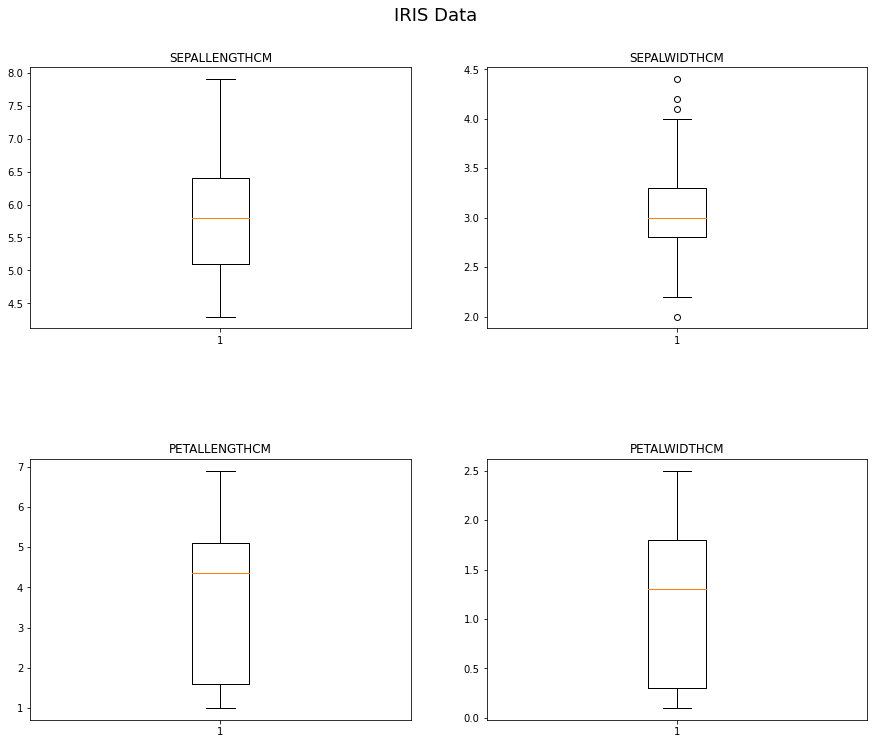

In [85]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("IRIS Data", fontsize=18, y=0.95)

for n, colname in enumerate(df.columns[1:5]):

    ax = plt.subplot(2, 2, n + 1)
    ax.boxplot(df[colname])
    
    ax.set_title(colname.upper())
    ax.set_xlabel("")

In [27]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [79]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(multi_class='ovr', random_state = 10)

classifier.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', random_state=10)

In [80]:
y_pred = classifier.predict(x_test)

In [81]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})

In [82]:
df2.shape

(30, 2)

In [83]:
classifier.score(x_test, y_test)

0.9666666666666667

0.9666666666666667

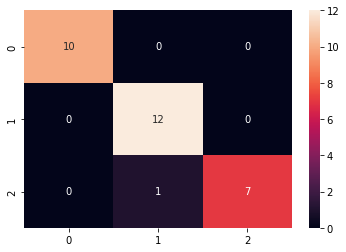

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
accuracy_score(y_pred, y_test)